In [1]:
library("car")
library("caret")
library("gvlma")
library("predictmeans")

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice

Loading required package: lme4

Loading required package: Matrix

Error: package or namespace load failed for ‘lme4’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘nloptr’



ERROR: Error: package ‘lme4’ could not be loaded


In [2]:
install.packages("nloptr")


The downloaded binary packages are in
	/var/folders/b6/tn8p_f9d1ls_4qs2b7h32md00000gn/T//Rtmp0Ifsgs/downloaded_packages


In [3]:
library("car")
library("caret")
library("gvlma")
library("predictmeans")

Loading required package: lme4

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList


Loading required package: lmeInfo

Loading required package: parallel



In [5]:
install.packages("readr")
install.packages("readxl")
library (readr)
library (readxl)


The downloaded binary packages are in
	/var/folders/b6/tn8p_f9d1ls_4qs2b7h32md00000gn/T//Rtmp0Ifsgs/downloaded_packages

The downloaded binary packages are in
	/var/folders/b6/tn8p_f9d1ls_4qs2b7h32md00000gn/T//Rtmp0Ifsgs/downloaded_packages


In [6]:
heights <- read_csv("/Users/christinasimbenga/Desktop/heights.csv")
head(heights)

Rows: 41 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): AM_Height, PM_Height

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


AM_Height,PM_Height
<dbl>,<dbl>
1728.75,1720.25
1538.25,1528.50
1462.25,1452.50
1782.50,1776.50
1671.00,1667.00
1581.75,1571.00


# Testing for Linearity

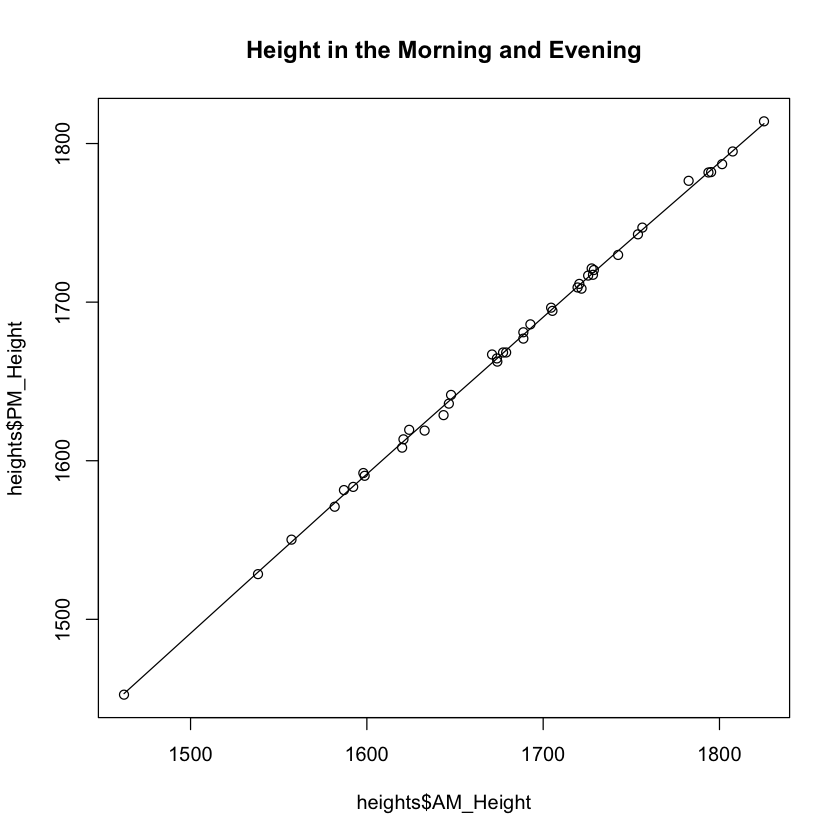

In [7]:
scatter.smooth(x=heights$AM_Height, y=heights$PM_Height, main="Height in the Morning and Evening")

#this is very linear, we passed the assumption of linearity

# Testing for Homoscedasticity 

In [8]:
lmMod_heights = lm(PM_Height~AM_Height, data=heights)

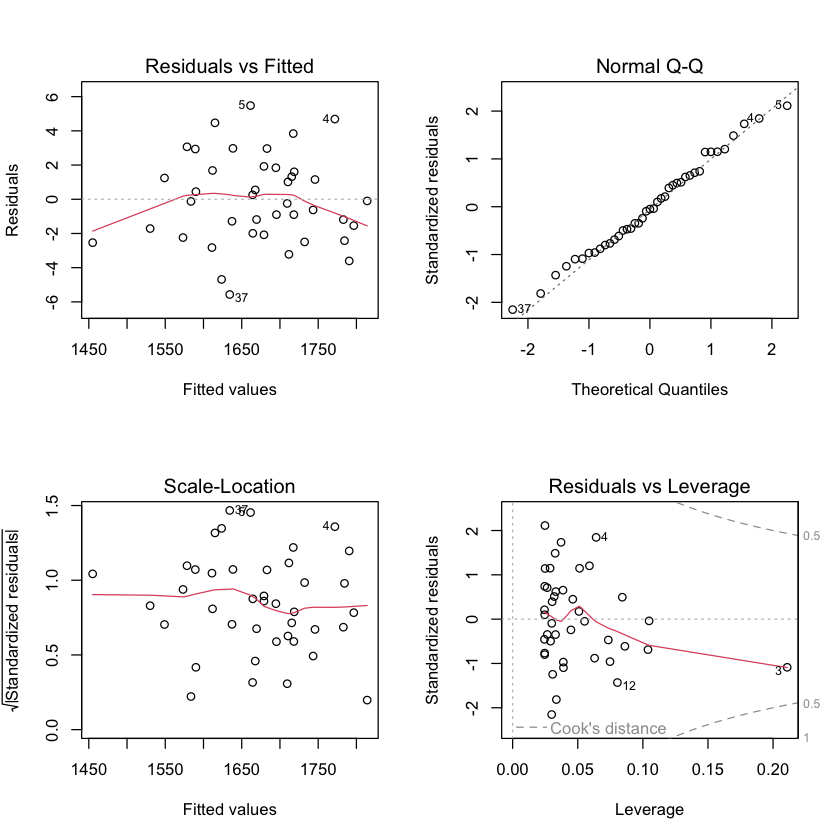

In [9]:
par(mfrow=c(2,2))
plot(lmMod_heights)

#Homoscedasiticity is supposed to show a flat line straight across but these lines have dips and the top left has a lift to it. I don't think we passed this assumption 

## running the BP test 

In [10]:
lmtest::bptest(lmMod_heights)


	studentized Breusch-Pagan test

data:  lmMod_heights
BP = 0.2079, df = 1, p-value = 0.6484


#the p-value here shows there's no significance meaning we actually do met the Homoscedasticity test 

## running the Non-constant variance test 

In [11]:
car::ncvTest(lmMod_heights)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1519285, Df = 1, p = 0.6967

#Also no significance to prove we have passed the assumption 

# Testing for Homogeneity of Variance 

In [12]:
gvlma(lmMod_heights)


Call:
lm(formula = PM_Height ~ AM_Height, data = heights)

Coefficients:
(Intercept)    AM_Height  
     8.6537       0.9891  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmMod_heights) 

                    Value p-value                Decision
Global Stat        2.6500  0.6180 Assumptions acceptable.
Skewness           0.0946  0.7584 Assumptions acceptable.
Kurtosis           0.4953  0.4816 Assumptions acceptable.
Link Function      1.8925  0.1689 Assumptions acceptable.
Heteroscedasticity 0.1676  0.6823 Assumptions acceptable.

#Everything is acceptable I think... as we should always question this test ;)

# Screening for outliers in x space

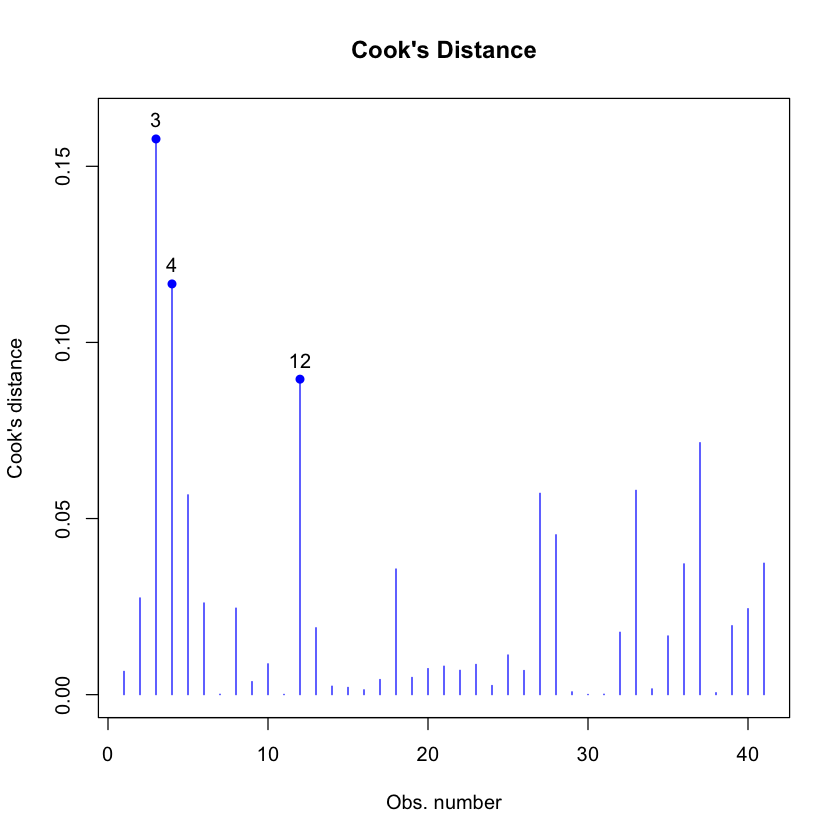

In [20]:
CookD(lmMod_heights, group=NULL, plot=TRUE, idn=3, newwd= FALSE)

#The outliers 3,4, 12 could cause a problem maybe 

## testing for leverage outliers 

AM_Height,PM_Height
<dbl>,<dbl>
1462.25,1452.5


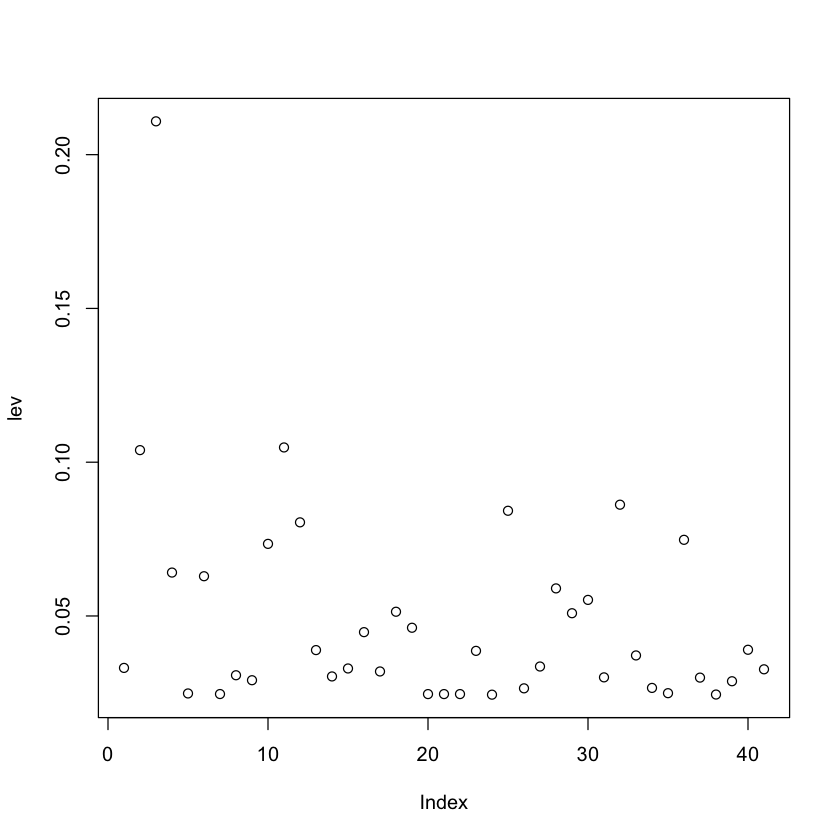

In [21]:
lev = hat(model.matrix(lmMod_heights))
plot(lev)

heights[lev>.2,]

#From this visual, it looks like 3 is really out there and could be an issue

## testing for outliers in y space 

In [22]:
car::outlierTest(lmMod_heights)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
37 -2.263445           0.029403           NA

#Looks like this is significant so theres an outlier somewhere 

## more outlier testing 

In [23]:
summary(influence.measures(lmMod_heights))

Potentially influential observations of
	 lm(formula = PM_Height ~ AM_Height, data = heights) :

   dfb.1_ dfb.AM_H dffit cov.r   cook.d hat    
3  -0.54   0.53    -0.56  1.26_*  0.16   0.21_*
11  0.01  -0.01    -0.01  1.18_*  0.00   0.10  
37 -0.19   0.17    -0.40  0.84_*  0.07   0.03  


#Looks like 3,11,37 are the problems we got to get ride of

# Model without the outliers 

In [24]:
heightsNoO <- heights[c(1,2,5,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41),]
lmMod_heightsNoO = lm(PM_Height~AM_Height, data=heightsNoO)

In [25]:
summary(lmMod_heights)


Call:
lm(formula = PM_Height ~ AM_Height, data = heights)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5694 -1.9884 -0.1255  1.6838  5.4790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.653685   8.714042   0.993    0.327    
AM_Height   0.989149   0.005177 191.066   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.627 on 39 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 3.651e+04 on 1 and 39 DF,  p-value: < 2.2e-16


#Looks like morning heights influence the evening hieghts with 99% variance when looking at the adjusted R-squared

In [26]:
summary(lmMod_heightsNoO)


Call:
lm(formula = PM_Height ~ AM_Height, data = heightsNoO)

Residuals:
   Min     1Q Median     3Q    Max 
-5.101 -1.743 -0.189  1.678  5.246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.835236   9.896369   1.701    0.098 .  
AM_Height    0.984392   0.005892 167.079   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.374 on 34 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9987 
F-statistic: 2.792e+04 on 1 and 34 DF,  p-value: < 2.2e-16


#Looks like theres not really much of a difference between the data with the outlier and the data without

# The end :-)